In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# loading data
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

print(data_train.shape)
print(data_test.shape)

(891, 12)
(418, 11)


In [3]:
# looking at the data
df = pd.DataFrame(data_train)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# deleting some unnecessary features

data_train.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)
dd = pd.DataFrame(data_train)
dd.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [5]:
# check missing values

print('jumlah nilai yang hilang dari atribut survived :', data_train.Survived.isnull().sum())
print('jumlah nilai yang hilang dari atribut pclass :', data_train.Pclass.isnull().sum())
print('jumlah nilai yang hilang dari atribut sex :', data_train.Sex.isnull().sum())
print('jumlah nilai yang hilang dari atribut age :', data_train.Age.isnull().sum())
print('jumlah nilai yang hilang dari atribut sibsp :', data_train.SibSp.isnull().sum())
print('jumlah nilai yang hilang dari atribut parch :', data_train.Parch.isnull().sum())
print('jumlah nilai yang hilang dari atribut fare :', data_train.Fare.isnull().sum())
print('jumlah nilai yang hilang dari atribut cabin :', data_train.Cabin.isnull().sum())
print('jumlah nilai yang hilang dari atribut embarked :', data_train.Embarked.isnull().sum())

jumlah nilai yang hilang dari atribut survived : 0
jumlah nilai yang hilang dari atribut pclass : 0
jumlah nilai yang hilang dari atribut sex : 0
jumlah nilai yang hilang dari atribut age : 177
jumlah nilai yang hilang dari atribut sibsp : 0
jumlah nilai yang hilang dari atribut parch : 0
jumlah nilai yang hilang dari atribut fare : 0
jumlah nilai yang hilang dari atribut cabin : 687
jumlah nilai yang hilang dari atribut embarked : 2


In [6]:
data_train[data_train.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,female,38.0,0,0,80.0,B28,NaN
829,1,1,female,62.0,0,0,80.0,B28,NaN


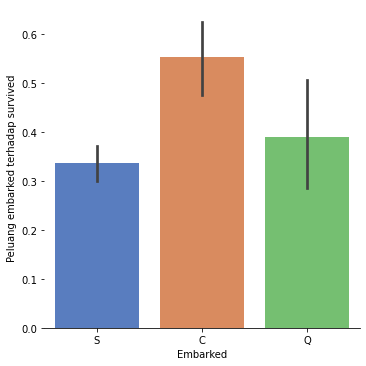

In [7]:
hst_embarked = sns.catplot(x='Embarked', y='Survived', 
                           data=data_train, height=5, kind='bar', palette='muted')

hst_embarked.despine(left=True)
hst_embarked = hst_embarked.set_ylabels('Peluang embarked terhadap survived')

In [8]:
data_train = data_train.fillna({'Embarked':'C'})
print('jumlah nilai yang kosong dari atribut embarked', data_train.Embarked.isnull().sum())

jumlah nilai yang kosong dari atribut embarked 0


In [9]:
data_train = data_train.fillna({'Cabin':'X'})
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,X,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,X,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,X,S


In [10]:
data_train['Cabin'] = data_train['Cabin'].str.slice(0,1)

In [11]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,X,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,X,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,X,S


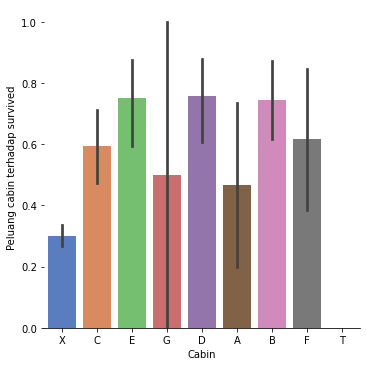

In [12]:
hst_cabin = sns.catplot(x='Cabin', y='Survived', 
                           data=data_train, height=5, kind='bar', palette='muted')

hst_cabin.despine(left=True)
hst_cabin = hst_cabin.set_ylabels('Peluang cabin terhadap survived')

In [13]:
data_train['Cabin'] = data_train['Cabin'].replace(['A','B','C','D','E','F','G','T','X'],[0,1,2,3,4,5,6,7,8])
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,8,S
1,1,1,female,38.0,1,0,71.2833,2,C
2,1,3,female,26.0,0,0,7.9250,8,S
3,1,1,female,35.0,1,0,53.1000,2,S
4,0,3,male,35.0,0,0,8.0500,8,S


In [14]:
data_train['Embarked'] = data_train['Embarked'].replace(['S','C','Q'],[0,1,2])
data_train['Sex'] = data_train['Sex'].replace(['male','female'],[0,1])
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,8,0
1,1,1,1,38.0,1,0,71.2833,2,1
2,1,3,1,26.0,0,0,7.9250,8,0
3,1,1,1,35.0,1,0,53.1000,2,0
4,0,3,0,35.0,0,0,8.0500,8,0


In [15]:
data_train['Age'] = data_train['Age'].fillna(data_train['Age'].mean())

In [16]:
print('jumlah nilai yang hilang dari atribut age :', data_train.Age.isnull().sum())

jumlah nilai yang hilang dari atribut age : 0


In [17]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,8,0
1,1,1,1,38.0,1,0,71.2833,2,1
2,1,3,1,26.0,0,0,7.9250,8,0
3,1,1,1,35.0,1,0,53.1000,2,0
4,0,3,0,35.0,0,0,8.0500,8,0


In [18]:
Y = data_train.Survived
X = data_train
X.drop(['Survived'],axis = 1, inplace = True)

In [19]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X,Y,test_size=0.1,random_state=42)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X,Y,test_size=0.3,random_state=42)
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X,Y,test_size=0.4,random_state=42)
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X,Y,test_size=0.5,random_state=42)

In [20]:
model1 = GaussianNB()
model1.fit(X_train1, Y_train1)

model2 = GaussianNB()
model2.fit(X_train2, Y_train2)

model3 = GaussianNB()
model3.fit(X_train3, Y_train3)

model4 = GaussianNB()
model4.fit(X_train4, Y_train4)

model5 = GaussianNB()
model5.fit(X_train5, Y_train5)

GaussianNB()

In [21]:
y_pred1 = model1.predict(X_test1)
y_pred2 = model2.predict(X_test2)
y_pred3 = model3.predict(X_test3)
y_pred4 = model4.predict(X_test4)
y_pred5 = model5.predict(X_test5)

acc1 = accuracy_score(y_pred1,Y_test1)
acc2 = accuracy_score(y_pred2,Y_test2)
acc3 = accuracy_score(y_pred3,Y_test3)
acc4 = accuracy_score(y_pred4,Y_test4)
acc5 = accuracy_score(y_pred5,Y_test5)

acc_test = [acc1, acc2, acc3, acc4, acc5]

In [22]:
print(acc_test)

[0.8111111111111111, 0.776536312849162, 0.8059701492537313, 0.8095238095238095, 0.7937219730941704]


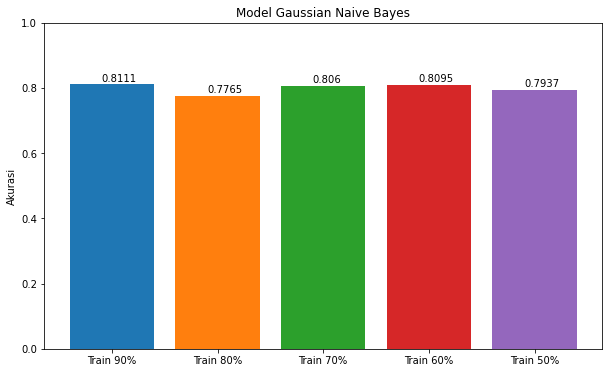

In [23]:
plt.figure(figsize=(10,6))
xlabels = ["Train 90%", "Train 80%", 
           "Train 70%", "Train 60%", "Train 50%"]
for i in range(len(xlabels)):
    plt.bar(xlabels[i], acc_test[i])
    plt.text(i-0.1, acc_test[i]+0.01, round(acc_test[i], 4))

plt.ylim([0,1])
plt.title("Model Gaussian Naive Bayes")
plt.ylabel("Akurasi")
plt.show()